<a href="https://colab.research.google.com/github/akritisshetty/spam-email-classifier/blob/main/SpamEmailClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing required libraries
!pip install scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Downloading dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

# Loading into pandas
data = pd.read_csv("SMSSpamCollection", sep='\t', names=['label', 'message'])
data.head()

--2025-09-05 04:07:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip.1’

smsspamcollection.z     [  <=>               ] 198.65K   657KB/s    in 0.3s    

2025-09-05 04:07:44 (657 KB/s) - ‘smsspamcollection.zip.1’ saved [203415]

Archive:  smsspamcollection.zip
replace SMSSpamCollection? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SMSSpamCollection       
replace readme? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: readme                  


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Splitting into X (features) and y (labels)
X = data['message']
y = data['label']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting text into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Training Models
# 1. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

Naive Bayes Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Logistic Regression Accuracy: 0.9695067264573991
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



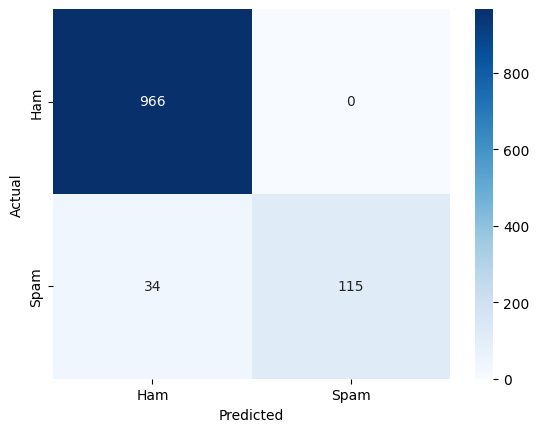

In [ ]:
# Evaluating both the models
# Naive Bayes Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Logistic Regression Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Making predictions on new emails:
def predict_spam(text, model):
    text_tfidf = vectorizer.transform([text])
    return model.predict(text_tfidf)[0]

print(predict_spam("Hey Akriti! Are we meeting at 6?", lr))
print(predict_spam("Congratulations! 🎉 You’ve won a FREE iPhone 14! Click the link below to claim your prize: http://scammy-link.com. Offer valid only for today.", lr))

ham
spam
